## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [99]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

#### Load the diabetes data

In [100]:
diabetes_data = pd.read_csv('data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [101]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**<font color='teal'> Apply the describe function to the data.</font>**

In [102]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [103]:
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes_data[columns_to_replace] = diabetes_data[columns_to_replace].replace(0, np.nan)

**<font color='teal'> Plot histograms of each column. </font>**

In [104]:
'''
# Melting the dataframe to long format for easier use with seaborn
long_format = diabetes_data.melt(value_vars=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'])

# Using seaborn's FacetGrid to create a grid of histograms
g = sns.FacetGrid(long_format, col="variable", col_wrap=3, sharex=False, sharey=False)
g.map(sns.histplot, "value")

plt.show()
'''

'\n# Melting the dataframe to long format for easier use with seaborn\nlong_format = diabetes_data.melt(value_vars=[\'Glucose\', \'BloodPressure\', \'SkinThickness\', \'Insulin\', \'BMI\'])\n\n# Using seaborn\'s FacetGrid to create a grid of histograms\ng = sns.FacetGrid(long_format, col="variable", col_wrap=3, sharex=False, sharey=False)\ng.map(sns.histplot, "value")\n\nplt.show()\n'

#### Replace the zeros with mean and median values.

In [105]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

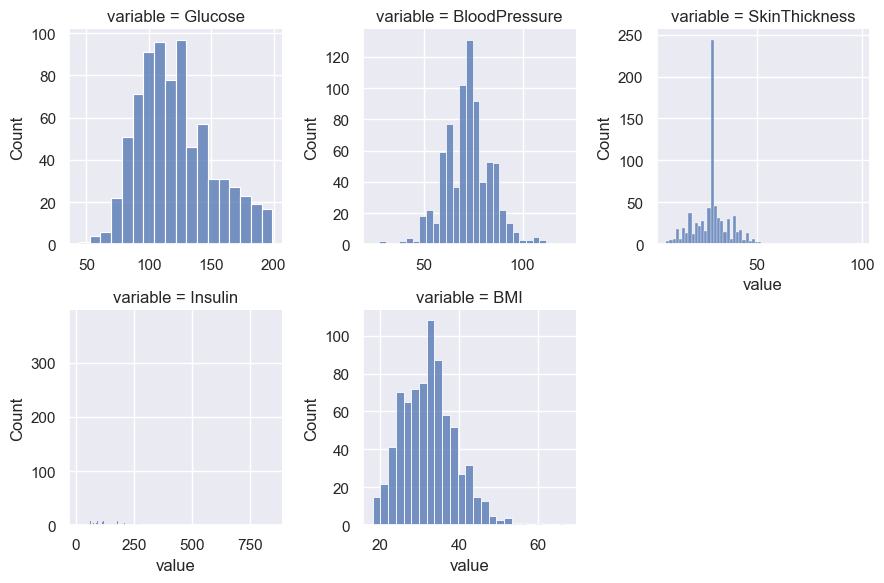

In [79]:

# Melting the dataframe to long format for easier use with seaborn
long_format = diabetes_data.melt(value_vars=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'])

# Using seaborn's FacetGrid to create a grid of histograms
g = sns.FacetGrid(long_format, col="variable", col_wrap=3, sharex=False, sharey=False)
g.map(sns.histplot, "value")

plt.show()

#### Plot the correlation matrix heatmap

Correlation between various features


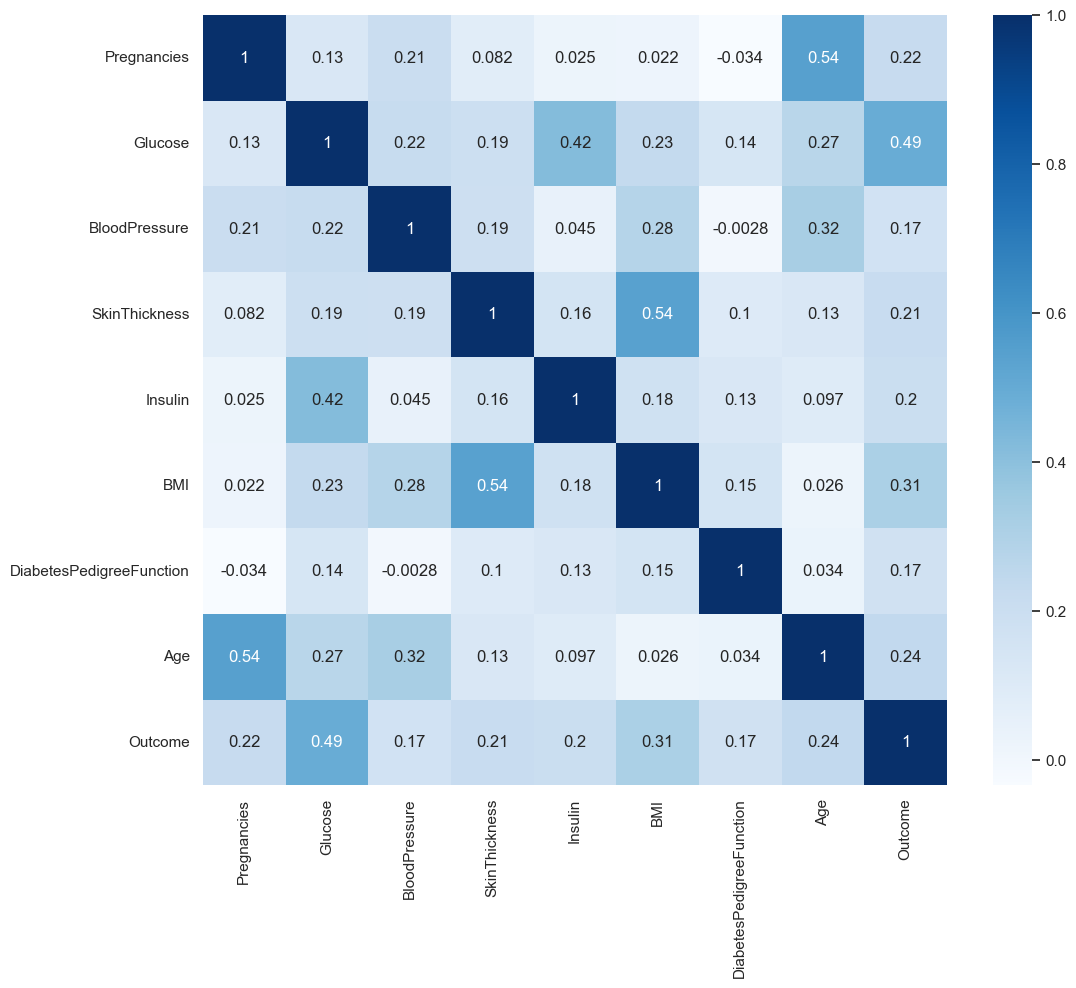

In [106]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [107]:
X = diabetes_data.drop('Outcome', axis=1)  # Features
y = diabetes_data['Outcome'] # Target variable

**<font color='teal'> Create a 70/30 train and test split. </font>**

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [109]:
scaler = StandardScaler()

# Fitting the scaler to the training data
scaler.fit(X_train)

# Transforming the training and testing sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [110]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [111]:
for i in train_scores:
    print(f'train scores = {i}')
    

train scores = 1.0
train scores = 0.845437616387337
train scores = 0.839851024208566
train scores = 0.8212290502793296
train scores = 0.8212290502793296
train scores = 0.8212290502793296
train scores = 0.8119180633147114
train scores = 0.8044692737430168
train scores = 0.7951582867783985


In [112]:
for i in test_scores:
    print(f'test scores = {i}')
    

test scores = 0.683982683982684
test scores = 0.7056277056277056
test scores = 0.6926406926406926
test scores = 0.70995670995671
test scores = 0.670995670995671
test scores = 0.7012987012987013
test scores = 0.696969696969697
test scores = 0.696969696969697
test scores = 0.70995670995671


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

In [114]:
k_best_test = train_scores.index(max(train_scores)) + 1
print(k_best_test)

1


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

In [115]:
k_test = test_scores.index(max(test_scores)) + 1
print(k_test)

4


Plot the train and test model performance by number of neighbors.

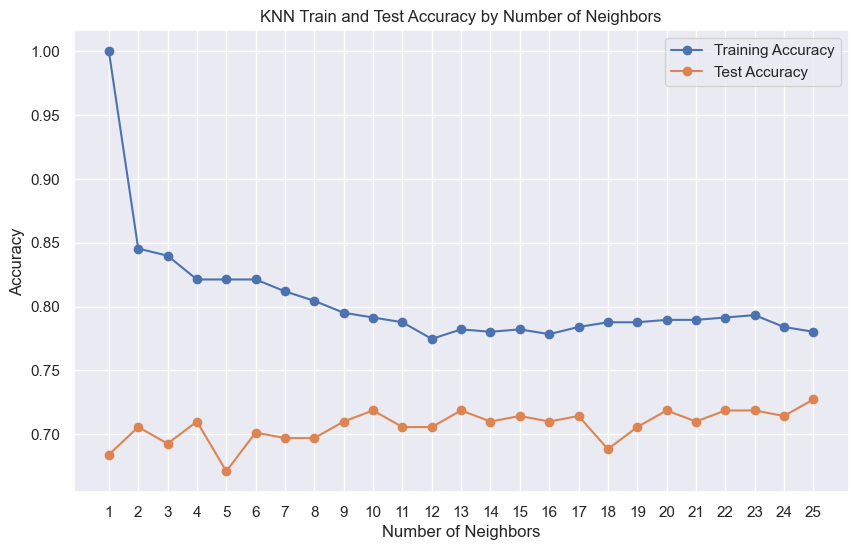

In [116]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Lists to store the accuracies of training and test sets
train_accuracies = []
test_accuracies = []

# Range of n_neighbors to try
neighbors_range = range(1, 26)

for n_neighbors in neighbors_range:
    # Initialize the KNN model with the current number of neighbors
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    # Fit the model on the training data
    knn.fit(X_train, y_train)
    
    # Predictions and accuracy for the training set
    train_pred = knn.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_accuracies.append(train_accuracy)
    
    # Predictions and accuracy for the test set
    test_pred = knn.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_accuracies.append(test_accuracy)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(neighbors_range, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(neighbors_range, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Train and Test Accuracy by Number of Neighbors')
plt.legend()
plt.xticks(neighbors_range)
plt.grid(True)
plt.show()


**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [119]:
from sklearn.neighbors import KNeighborsClassifier

# Assuming X_train, X_test, y_train, y_test are already defined

# Initialize the KNN with k=3, which seems to be the best choice based on the plot
knn_best = KNeighborsClassifier(n_neighbors=13)

# Fit the model
knn_best.fit(X_train, y_train)

# Score the model on the training data
train_score_best = knn_best.score(X_train, y_train)

# Score the model on the testing data
test_score_best = knn_best.score(X_test, y_test)

print(f"Best KNN model with k=14: Train Score = {train_score_best}, Test Score = {test_score_best}")

Best KNN model with k=14: Train Score = 0.7821229050279329, Test Score = 0.7186147186147186


In [59]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
pl = confusion_matrix(y_test,y_pred)

**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

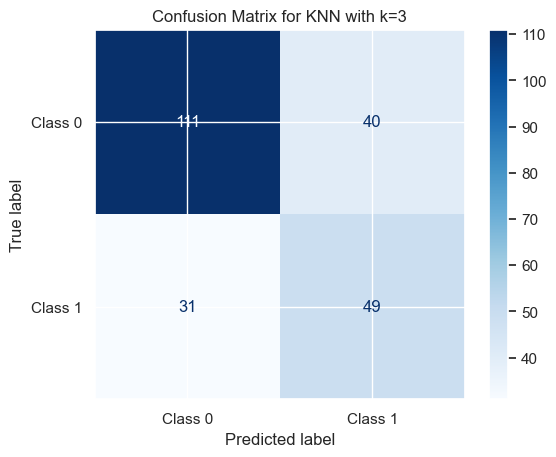

In [60]:
from sklearn.metrics import ConfusionMatrixDisplay

# Use the fitted model and test data to plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(knn_best, X_test, y_test,
                                      display_labels=["Class 0", "Class 1"],
                                      cmap=plt.cm.Blues)
plt.title('Confusion Matrix for KNN with k=3')
plt.show()


**<font color='teal'> Print the classification report </font>**

In [61]:
from sklearn.metrics import classification_report

# Use the predictions from the knn_best model
y_pred_best = knn_best.predict(X_test)

# Generate the classification report
class_report = classification_report(y_test, y_pred_best)

print(class_report)

              precision    recall  f1-score   support

           0       0.78      0.74      0.76       151
           1       0.55      0.61      0.58        80

    accuracy                           0.69       231
   macro avg       0.67      0.67      0.67       231
weighted avg       0.70      0.69      0.70       231



#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [62]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

#### Print the best score and best parameter for n_neighbors.

In [63]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7526440879382056
Best Parameters: {'n_neighbors': 31}


Here you can see that the ideal number of n_neighbors for this model is 14 based on the grid search performed. 

**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define a range of estimators to search over
param_grid = {
    'n_estimators': [10, 50, 100, 200, 500]
}

# Initialize the Random Forest classifier
rf = RandomForestClassifier()

# Initialize the Grid Search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the Grid Search model
grid_search.fit(X_train, y_train)

# Retrieve the best number of estimators found by Grid Search
best_n_estimators = grid_search.best_params_['n_estimators']

# Retrieve the best Random Forest model from Grid Search
best_rf_model = grid_search.best_estimator_

# Print the optimal number of estimators
print(f"The optimal number of estimators is: {best_n_estimators}")

# Optional: Evaluate the best model's accuracy on the test set
test_accuracy = best_rf_model.score(X_test, y_test)
print(f"The best Random Forest model's accuracy on the test set is: {test_accuracy:.4f}")


The optimal number of estimators is: 100
The best Random Forest model's accuracy on the test set is: 0.7446
